# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:34:00.989338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:34:04.000504
2025-04-14 19:34:04.000504


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:33:59"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

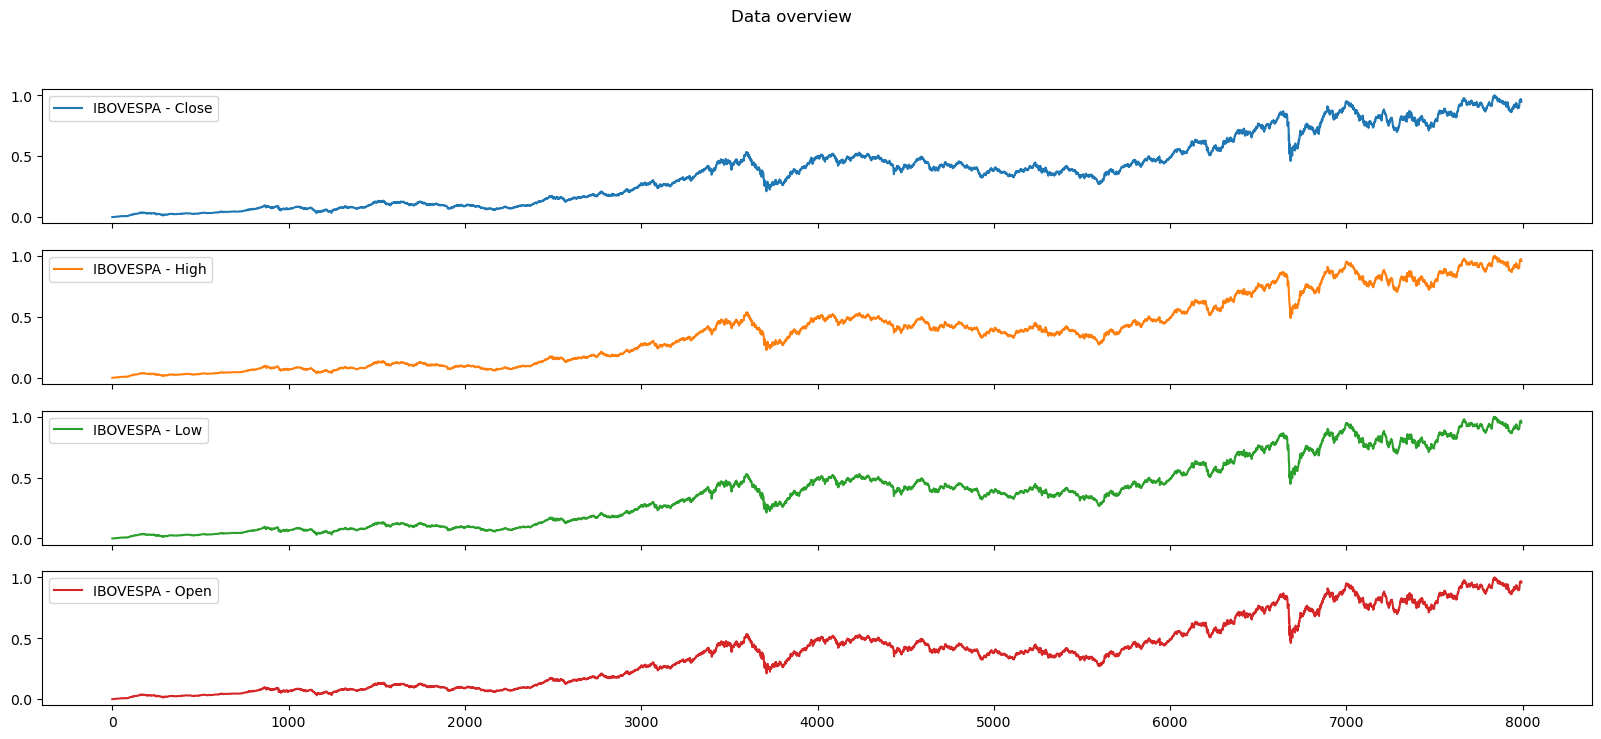

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

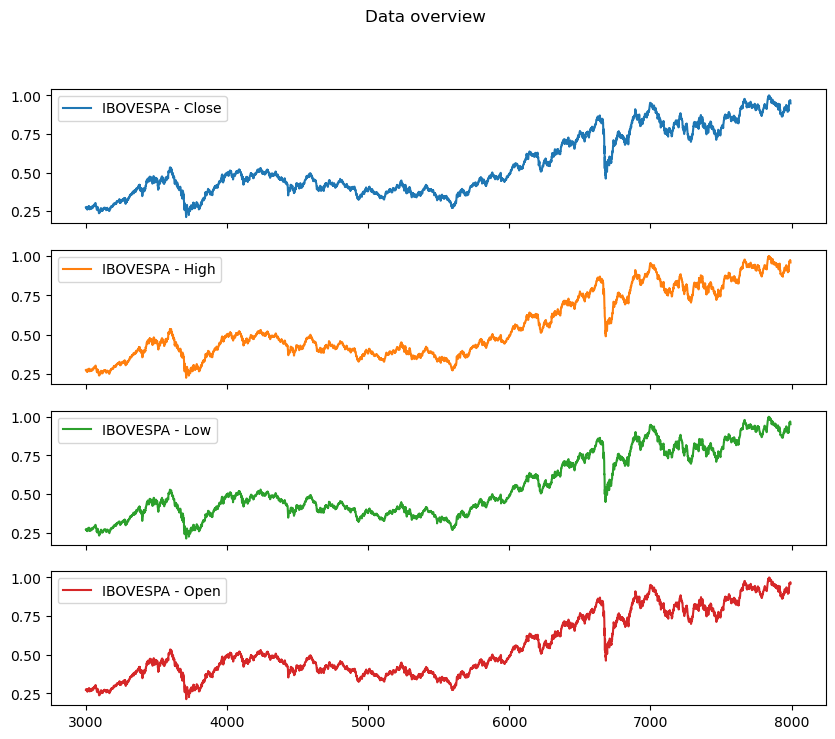

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

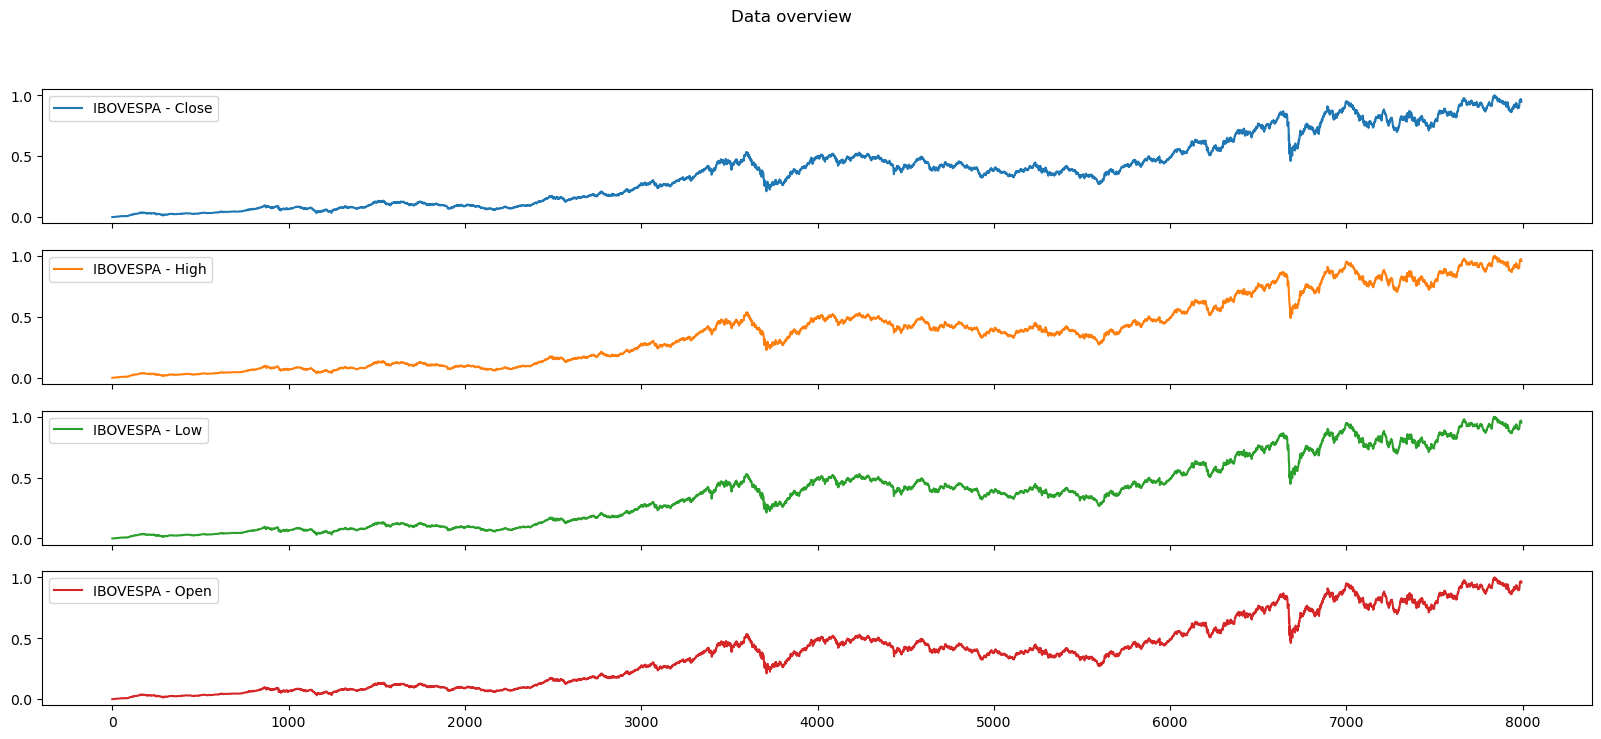

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

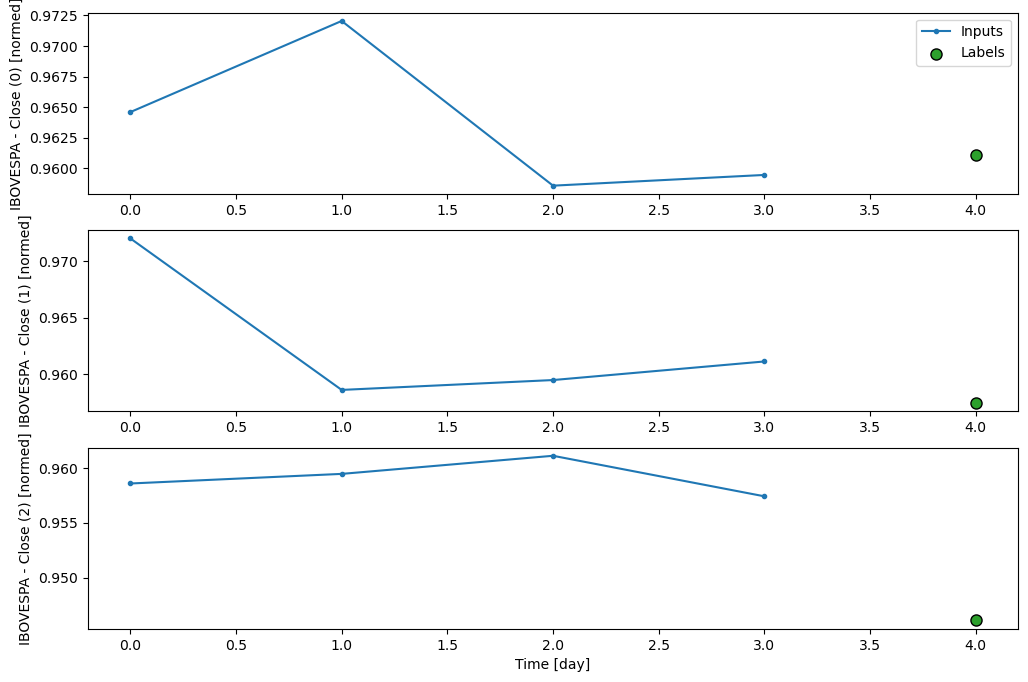

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:59 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 61.3738 - mean_squared_error: 1.4647e-04 - root_mean_squared_error: 0.0108   

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 53.3647 - mean_squared_error: 1.6159e-04 - root_mean_squared_error: 0.0120

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.1182 - mean_squared_error: 1.6533e-04 - root_mean_squared_error: 0.0124

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.9930 - mean_squared_error: 1.9202e-04 - root_mean_squared_error: 0.0134

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 39.3331 - mean_squared_error: 2.4007e-04 - root_mean_squared_error: 0.0149

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 37.4389 - mean_squared_error: 2.6323e-04 - root_mean_squared_error: 0.0156

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 35.9340 - mean_squared_error: 3.0040e-04 - root_mean_squared_error: 0.0166

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 34.6571 - mean_squared_error: 3.2679e-04 - root_mean_squared_error: 0.0174

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 33.1952 - mean_squared_error: 3.7291e-04 - root_mean_squared_error: 0.0185

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 32.0628 - mean_squared_error: 4.6277e-04 - root_mean_squared_error: 0.0202

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 31.1925 - mean_squared_error: 6.8884e-04 - root_mean_squared_error: 0.0233

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 30.4953 - mean_squared_error: 9.0479e-04 - root_mean_squared_error: 0.0261

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 29.7929 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287    

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 29.1441 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 28.5513 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 28.0079 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 27.5295 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 27.0580 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 26.6369 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845 - val_mean_absolute_percentage_error: 9.0041 - val_mean_squared_error: 0.0083 - val_root_mean_squared_error: 0.0909


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 22562.4395 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4812

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 8428.0273 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4554  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 5446.0977 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3913

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 4200.2363 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3475

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 3454.9365 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3157

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 2919.0623 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2897

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 2565.4529 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2709

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 2275.9307 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2543

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 2066.0776 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2416

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 1882.0573 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2298

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1730.8989 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2196

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1604.3195 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2109

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 1504.2902 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2037

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1423.9230 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.1977

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1340.3126 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1913

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1266.8213 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1856

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1211.2092 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1811

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1152.0225 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1762

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1098.8553 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1718

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 1050.8066 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1677


Epoch: 2 - LR: 0.009510851465165615


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1043.8285 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1672 - val_loss: 0.0846 - val_mean_absolute_error: 0.0846 - val_mean_absolute_percentage_error: 9.0621 - val_mean_squared_error: 0.0077 - val_root_mean_squared_error: 0.0877


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 6283.4771 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1340

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 2046.3812 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1040 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1360.0822 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0884

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 1044.0288 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0782

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 906.2737 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0730 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 784.3843 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0679

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 694.1037 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0637

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 624.2354 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 563.8243 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 511.4230 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 471.7601 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 435.8049 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 405.4178 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 381.2369 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 360.0343 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 341.2749 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 324.5468 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 308.3470 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 293.8421 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 280.7754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 274.2596 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398 - val_mean_absolute_percentage_error: 4.2637 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0417


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 1018.5221 - mean_squared_error: 4.7034e-04 - root_mean_squared_error: 0.0217

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 330.8608 - mean_squared_error: 2.6903e-04 - root_mean_squared_error: 0.0163  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 219.9367 - mean_squared_error: 2.3063e-04 - root_mean_squared_error: 0.0151

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 191.2982 - mean_squared_error: 2.1520e-04 - root_mean_squared_error: 0.0145

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 173.4680 - mean_squared_error: 2.0689e-04 - root_mean_squared_error: 0.0142

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 154.2809 - mean_squared_error: 1.9685e-04 - root_mean_squared_error: 0.0139

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 137.7259 - mean_squared_error: 1.8808e-04 - root_mean_squared_error: 0.0136

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 123.4035 - mean_squared_error: 1.7916e-04 - root_mean_squared_error: 0.0132

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 110.0416 - mean_squared_error: 1.7001e-04 - root_mean_squared_error: 0.0129

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 102.3090 - mean_squared_error: 1.6434e-04 - root_mean_squared_error: 0.0127

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 96.5025 - mean_squared_error: 1.5967e-04 - root_mean_squared_error: 0.0125 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 90.0643 - mean_squared_error: 1.5422e-04 - root_mean_squared_error: 0.0123

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 84.5553 - mean_squared_error: 1.5043e-04 - root_mean_squared_error: 0.0121

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 78.8016 - mean_squared_error: 1.4820e-04 - root_mean_squared_error: 0.0120

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 75.1644 - mean_squared_error: 1.4884e-04 - root_mean_squared_error: 0.0121

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 72.6882 - mean_squared_error: 1.5033e-04 - root_mean_squared_error: 0.0121

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 68.9616 - mean_squared_error: 1.5406e-04 - root_mean_squared_error: 0.0123

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 64.7305 - mean_squared_error: 1.5839e-04 - root_mean_squared_error: 0.0124

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.5895 - mean_squared_error: 1.6113e-04 - root_mean_squared_error: 0.0126

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 59.5164 - mean_squared_error: 1.6264e-04 - root_mean_squared_error: 0.0126

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.5978 - mean_squared_error: 1.6380e-04 - root_mean_squared_error: 0.0127

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.1795 - mean_squared_error: 1.6489e-04 - root_mean_squared_error: 0.0127

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7921 - mean_squared_error: 1.6565e-04 - root_mean_squared_error: 0.0128

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.9758 - mean_squared_error: 1.6638e-04 - root_mean_squared_error: 0.0128

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.4610 - mean_squared_error: 1.6771e-04 - root_mean_squared_error: 0.0128

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.5952 - mean_squared_error: 1.6972e-04 - root_mean_squared_error: 0.0129


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.5801 - mean_squared_error: 1.7092e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0150 - val_mean_absolute_error: 0.0150 - val_mean_absolute_percentage_error: 1.5957 - val_mean_squared_error: 3.0424e-04 - val_root_mean_squared_error: 0.0174


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 2969.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0633

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 944.8424 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456   

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 621.9467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 483.8275 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 424.3402 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 384.2422 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 339.6821 - mean_squared_error: 9.0454e-04 - root_mean_squared_error: 0.0279

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 296.4697 - mean_squared_error: 7.9831e-04 - root_mean_squared_error: 0.0260

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 268.4114 - mean_squared_error: 7.2833e-04 - root_mean_squared_error: 0.0247

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 253.4332 - mean_squared_error: 6.9072e-04 - root_mean_squared_error: 0.0240

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 241.9995 - mean_squared_error: 6.6195e-04 - root_mean_squared_error: 0.0234

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 226.8465 - mean_squared_error: 6.2380e-04 - root_mean_squared_error: 0.0226

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 210.9625 - mean_squared_error: 5.8454e-04 - root_mean_squared_error: 0.0218

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 197.3750 - mean_squared_error: 5.5225e-04 - root_mean_squared_error: 0.0212

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 188.6520 - mean_squared_error: 5.3184e-04 - root_mean_squared_error: 0.0208

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 177.9677 - mean_squared_error: 5.0718e-04 - root_mean_squared_error: 0.0203

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 166.9463 - mean_squared_error: 4.8161e-04 - root_mean_squared_error: 0.0197

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 157.3365 - mean_squared_error: 4.5920e-04 - root_mean_squared_error: 0.0193

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 150.1115 - mean_squared_error: 4.4229e-04 - root_mean_squared_error: 0.0189

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 144.7238 - mean_squared_error: 4.2969e-04 - root_mean_squared_error: 0.0186

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 140.2816 - mean_squared_error: 4.1946e-04 - root_mean_squared_error: 0.0184

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 134.1608 - mean_squared_error: 4.0766e-04 - root_mean_squared_error: 0.0182

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 128.1709 - mean_squared_error: 4.0070e-04 - root_mean_squared_error: 0.0181


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 124.3630 - mean_squared_error: 3.9787e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_absolute_percentage_error: 2.8621 - val_mean_squared_error: 8.4409e-04 - val_root_mean_squared_error: 0.0291


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 1972.9653 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 805.0593 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 594.2852 - mean_squared_error: 8.7772e-04 - root_mean_squared_error: 0.0289

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 495.4036 - mean_squared_error: 7.5616e-04 - root_mean_squared_error: 0.0266

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 378.2147 - mean_squared_error: 5.9922e-04 - root_mean_squared_error: 0.0234

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 299.6337 - mean_squared_error: 4.9070e-04 - root_mean_squared_error: 0.0209

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 250.8187 - mean_squared_error: 4.2308e-04 - root_mean_squared_error: 0.0193

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 232.5983 - mean_squared_error: 3.9849e-04 - root_mean_squared_error: 0.0187

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 205.9801 - mean_squared_error: 3.6192e-04 - root_mean_squared_error: 0.0178

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 188.8100 - mean_squared_error: 3.3753e-04 - root_mean_squared_error: 0.0171

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 173.1674 - mean_squared_error: 3.1558e-04 - root_mean_squared_error: 0.0165

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 157.8525 - mean_squared_error: 2.9455e-04 - root_mean_squared_error: 0.0160

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 147.2378 - mean_squared_error: 2.8121e-04 - root_mean_squared_error: 0.0156

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 139.8389 - mean_squared_error: 2.7322e-04 - root_mean_squared_error: 0.0154

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 134.0313 - mean_squared_error: 2.6925e-04 - root_mean_squared_error: 0.0154

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 126.6279 - mean_squared_error: 2.6694e-04 - root_mean_squared_error: 0.0154

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 118.8734 - mean_squared_error: 2.6481e-04 - root_mean_squared_error: 0.0154

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 111.5856 - mean_squared_error: 2.6187e-04 - root_mean_squared_error: 0.0154

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 107.5758 - mean_squared_error: 2.5978e-04 - root_mean_squared_error: 0.0153

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 104.3221 - mean_squared_error: 2.5782e-04 - root_mean_squared_error: 0.0153

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 99.6299 - mean_squared_error: 2.5455e-04 - root_mean_squared_error: 0.0152 

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 94.6548 - mean_squared_error: 2.5058e-04 - root_mean_squared_error: 0.0151

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 90.2035 - mean_squared_error: 2.4707e-04 - root_mean_squared_error: 0.0151

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 87.3855 - mean_squared_error: 2.4500e-04 - root_mean_squared_error: 0.0150

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 84.7579 - mean_squared_error: 2.4333e-04 - root_mean_squared_error: 0.0150


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 82.8336 - mean_squared_error: 2.4214e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.8693 - val_mean_squared_error: 3.7858e-04 - val_root_mean_squared_error: 0.0195


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 610.7109 - mean_squared_error: 1.6959e-04 - root_mean_squared_error: 0.0130

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 199.7193 - mean_squared_error: 1.0065e-04 - root_mean_squared_error: 0.0100 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 126.6387 - mean_squared_error: 7.6196e-05 - root_mean_squared_error: 0.0086

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 97.3164 - mean_squared_error: 6.2775e-05 - root_mean_squared_error: 0.0077 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 78.9941 - mean_squared_error: 5.3548e-05 - root_mean_squared_error: 0.0071

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 67.8204 - mean_squared_error: 4.7558e-05 - root_mean_squared_error: 0.0066

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 59.1411 - mean_squared_error: 4.2658e-05 - root_mean_squared_error: 0.0062

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 53.0895 - mean_squared_error: 3.9166e-05 - root_mean_squared_error: 0.0059

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.9342 - mean_squared_error: 3.6270e-05 - root_mean_squared_error: 0.0057

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.7975 - mean_squared_error: 3.4334e-05 - root_mean_squared_error: 0.0056

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 40.8896 - mean_squared_error: 3.4149e-05 - root_mean_squared_error: 0.0056

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.1922 - mean_squared_error: 3.5519e-05 - root_mean_squared_error: 0.0057

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 35.8796 - mean_squared_error: 3.7703e-05 - root_mean_squared_error: 0.0059

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.8681 - mean_squared_error: 3.9798e-05 - root_mean_squared_error: 0.0060

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.9621 - mean_squared_error: 4.1705e-05 - root_mean_squared_error: 0.0062

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.2888 - mean_squared_error: 4.3404e-05 - root_mean_squared_error: 0.0063

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.9153 - mean_squared_error: 4.5054e-05 - root_mean_squared_error: 0.0065

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 27.5849 - mean_squared_error: 4.8013e-05 - root_mean_squared_error: 0.0066

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 26.4818 - mean_squared_error: 5.2706e-05 - root_mean_squared_error: 0.0069

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.4794 - mean_squared_error: 5.8369e-05 - root_mean_squared_error: 0.0072


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.1649 - mean_squared_error: 6.0181e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8290 - val_mean_squared_error: 9.0491e-05 - val_root_mean_squared_error: 0.0095


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 2195.8245 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 702.9564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 516.4422 - mean_squared_error: 9.8790e-04 - root_mean_squared_error: 0.0306

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 406.2011 - mean_squared_error: 8.1173e-04 - root_mean_squared_error: 0.0275

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 349.6950 - mean_squared_error: 7.1418e-04 - root_mean_squared_error: 0.0255

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 303.9662 - mean_squared_error: 6.3165e-04 - root_mean_squared_error: 0.0238

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 266.5749 - mean_squared_error: 5.6194e-04 - root_mean_squared_error: 0.0223

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 233.2844 - mean_squared_error: 4.9816e-04 - root_mean_squared_error: 0.0208

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 206.2544 - mean_squared_error: 4.4522e-04 - root_mean_squared_error: 0.0195

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 185.3620 - mean_squared_error: 4.0371e-04 - root_mean_squared_error: 0.0184

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 169.8390 - mean_squared_error: 3.7274e-04 - root_mean_squared_error: 0.0176

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 158.9466 - mean_squared_error: 3.5150e-04 - root_mean_squared_error: 0.0171

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.0651 - mean_squared_error: 3.4226e-04 - root_mean_squared_error: 0.0168

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 151.2937 - mean_squared_error: 3.3709e-04 - root_mean_squared_error: 0.0167

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 144.4192 - mean_squared_error: 3.2450e-04 - root_mean_squared_error: 0.0164

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 134.6188 - mean_squared_error: 3.0724e-04 - root_mean_squared_error: 0.0159

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 126.7956 - mean_squared_error: 2.9366e-04 - root_mean_squared_error: 0.0156

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 121.0064 - mean_squared_error: 2.8356e-04 - root_mean_squared_error: 0.0153

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.2760 - mean_squared_error: 2.7530e-04 - root_mean_squared_error: 0.0151

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 112.8717 - mean_squared_error: 2.6939e-04 - root_mean_squared_error: 0.0149

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 108.3759 - mean_squared_error: 2.6180e-04 - root_mean_squared_error: 0.0147

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 103.0961 - mean_squared_error: 2.5410e-04 - root_mean_squared_error: 0.0145

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.3628 - mean_squared_error: 2.4991e-04 - root_mean_squared_error: 0.0145 

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 94.0923 - mean_squared_error: 2.4852e-04 - root_mean_squared_error: 0.0145


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 93.1659 - mean_squared_error: 2.4851e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8602 - val_mean_squared_error: 9.8367e-05 - val_root_mean_squared_error: 0.0099


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 2118.4399 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 680.1250 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 453.1434 - mean_squared_error: 8.8230e-04 - root_mean_squared_error: 0.0290

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 355.2013 - mean_squared_error: 7.3732e-04 - root_mean_squared_error: 0.0263

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 291.4582 - mean_squared_error: 6.3175e-04 - root_mean_squared_error: 0.0241

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 251.7999 - mean_squared_error: 5.6247e-04 - root_mean_squared_error: 0.0227

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 224.8181 - mean_squared_error: 5.1312e-04 - root_mean_squared_error: 0.0215

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 208.9615 - mean_squared_error: 4.8335e-04 - root_mean_squared_error: 0.0208

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 195.4446 - mean_squared_error: 4.5785e-04 - root_mean_squared_error: 0.0202

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 181.0917 - mean_squared_error: 4.3122e-04 - root_mean_squared_error: 0.0196

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 172.3807 - mean_squared_error: 4.1558e-04 - root_mean_squared_error: 0.0192

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 159.4594 - mean_squared_error: 3.9437e-04 - root_mean_squared_error: 0.0187

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 147.7519 - mean_squared_error: 3.8617e-04 - root_mean_squared_error: 0.0186

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 137.8415 - mean_squared_error: 3.8362e-04 - root_mean_squared_error: 0.0186

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 129.3129 - mean_squared_error: 3.7986e-04 - root_mean_squared_error: 0.0186

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 121.8850 - mean_squared_error: 3.7508e-04 - root_mean_squared_error: 0.0185

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 115.8273 - mean_squared_error: 3.7020e-04 - root_mean_squared_error: 0.0185

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 109.9787 - mean_squared_error: 3.6459e-04 - root_mean_squared_error: 0.0184

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 104.7518 - mean_squared_error: 3.5899e-04 - root_mean_squared_error: 0.0183

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 100.3949 - mean_squared_error: 3.5426e-04 - root_mean_squared_error: 0.0182

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 96.4232 - mean_squared_error: 3.4970e-04 - root_mean_squared_error: 0.0181 


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 94.8704 - mean_squared_error: 3.4787e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6996 - val_mean_squared_error: 6.7217e-05 - val_root_mean_squared_error: 0.0082


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 877.9177 - mean_squared_error: 3.4972e-04 - root_mean_squared_error: 0.0187

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 286.8464 - mean_squared_error: 1.6420e-04 - root_mean_squared_error: 0.0125 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 202.3769 - mean_squared_error: 1.2852e-04 - root_mean_squared_error: 0.0110

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 160.4593 - mean_squared_error: 1.1018e-04 - root_mean_squared_error: 0.0102

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 134.4884 - mean_squared_error: 9.7631e-05 - root_mean_squared_error: 0.0095

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 114.9935 - mean_squared_error: 8.7613e-05 - root_mean_squared_error: 0.0090

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 102.2027 - mean_squared_error: 8.0581e-05 - root_mean_squared_error: 0.0086

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 92.2627 - mean_squared_error: 7.4754e-05 - root_mean_squared_error: 0.0083 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 84.2955 - mean_squared_error: 6.9845e-05 - root_mean_squared_error: 0.0080

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 77.0875 - mean_squared_error: 6.5307e-05 - root_mean_squared_error: 0.0077

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.2525 - mean_squared_error: 6.2274e-05 - root_mean_squared_error: 0.0075

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.0541 - mean_squared_error: 6.0322e-05 - root_mean_squared_error: 0.0074

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.6236 - mean_squared_error: 5.8872e-05 - root_mean_squared_error: 0.0073

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.5288 - mean_squared_error: 5.7175e-05 - root_mean_squared_error: 0.0072

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 61.1254 - mean_squared_error: 5.6128e-05 - root_mean_squared_error: 0.0071

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.5720 - mean_squared_error: 5.5271e-05 - root_mean_squared_error: 0.0071

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.2496 - mean_squared_error: 5.4653e-05 - root_mean_squared_error: 0.0071

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.2726 - mean_squared_error: 5.4119e-05 - root_mean_squared_error: 0.0071

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.8856 - mean_squared_error: 5.4056e-05 - root_mean_squared_error: 0.0071

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.9592 - mean_squared_error: 5.4079e-05 - root_mean_squared_error: 0.0071

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.1914 - mean_squared_error: 5.4105e-05 - root_mean_squared_error: 0.0071

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.3698 - mean_squared_error: 5.4243e-05 - root_mean_squared_error: 0.0071

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.7009 - mean_squared_error: 5.4354e-05 - root_mean_squared_error: 0.0071

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.8403 - mean_squared_error: 5.4471e-05 - root_mean_squared_error: 0.0072

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 40.0049 - mean_squared_error: 5.4815e-05 - root_mean_squared_error: 0.0072

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.3481 - mean_squared_error: 5.7197e-05 - root_mean_squared_error: 0.0073

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.9636 - mean_squared_error: 6.0440e-05 - root_mean_squared_error: 0.0075


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.0269 - mean_squared_error: 6.2889e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8564 - val_mean_squared_error: 1.0001e-04 - val_root_mean_squared_error: 0.0100


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 2754.7412 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0587

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 1082.1736 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 756.7204 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 611.0402 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 516.9425 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 450.4904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 382.9955 - mean_squared_error: 9.6790e-04 - root_mean_squared_error: 0.0291

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 338.9209 - mean_squared_error: 8.6482e-04 - root_mean_squared_error: 0.0273

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 301.5145 - mean_squared_error: 7.7585e-04 - root_mean_squared_error: 0.0257

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 277.6200 - mean_squared_error: 7.1830e-04 - root_mean_squared_error: 0.0245

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 259.9209 - mean_squared_error: 6.7537e-04 - root_mean_squared_error: 0.0237

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 238.5816 - mean_squared_error: 6.2326e-04 - root_mean_squared_error: 0.0226

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 219.1779 - mean_squared_error: 5.7569e-04 - root_mean_squared_error: 0.0216

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 204.3362 - mean_squared_error: 5.3945e-04 - root_mean_squared_error: 0.0209

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 191.5697 - mean_squared_error: 5.0906e-04 - root_mean_squared_error: 0.0202

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 183.6381 - mean_squared_error: 4.9055e-04 - root_mean_squared_error: 0.0198

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 176.4025 - mean_squared_error: 4.7378e-04 - root_mean_squared_error: 0.0194

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 168.8704 - mean_squared_error: 4.5645e-04 - root_mean_squared_error: 0.0191

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 159.6051 - mean_squared_error: 4.3522e-04 - root_mean_squared_error: 0.0186

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 152.1044 - mean_squared_error: 4.1792e-04 - root_mean_squared_error: 0.0182

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 145.9905 - mean_squared_error: 4.0382e-04 - root_mean_squared_error: 0.0179

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.5981 - mean_squared_error: 3.9366e-04 - root_mean_squared_error: 0.0176

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 138.6351 - mean_squared_error: 3.8679e-04 - root_mean_squared_error: 0.0175

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 135.2555 - mean_squared_error: 3.7894e-04 - root_mean_squared_error: 0.0173

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 130.0096 - mean_squared_error: 3.6687e-04 - root_mean_squared_error: 0.0170

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.5978 - mean_squared_error: 3.5946e-04 - root_mean_squared_error: 0.0169

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 123.3806 - mean_squared_error: 3.5343e-04 - root_mean_squared_error: 0.0167

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 120.7644 - mean_squared_error: 3.4907e-04 - root_mean_squared_error: 0.0167

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 116.6680 - mean_squared_error: 3.4304e-04 - root_mean_squared_error: 0.0166


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 114.7339 - mean_squared_error: 3.4032e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.3036 - val_mean_squared_error: 1.9668e-04 - val_root_mean_squared_error: 0.0140


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 1698.6653 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 698.4700 - mean_squared_error: 8.5289e-04 - root_mean_squared_error: 0.0288

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 452.5854 - mean_squared_error: 6.6484e-04 - root_mean_squared_error: 0.0253

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 346.1417 - mean_squared_error: 5.5087e-04 - root_mean_squared_error: 0.0229

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 299.7963 - mean_squared_error: 4.9361e-04 - root_mean_squared_error: 0.0216

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 265.6134 - mean_squared_error: 4.4816e-04 - root_mean_squared_error: 0.0204

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 235.9267 - mean_squared_error: 4.0678e-04 - root_mean_squared_error: 0.0194

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 207.8727 - mean_squared_error: 3.6615e-04 - root_mean_squared_error: 0.0183

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 186.4282 - mean_squared_error: 3.3396e-04 - root_mean_squared_error: 0.0173

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.5515 - mean_squared_error: 3.1260e-04 - root_mean_squared_error: 0.0167

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 163.5775 - mean_squared_error: 2.9862e-04 - root_mean_squared_error: 0.0163

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 153.1240 - mean_squared_error: 2.8220e-04 - root_mean_squared_error: 0.0158

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 140.9754 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0152

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 131.6632 - mean_squared_error: 2.4923e-04 - root_mean_squared_error: 0.0147

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 125.1545 - mean_squared_error: 2.4022e-04 - root_mean_squared_error: 0.0145

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 120.0270 - mean_squared_error: 2.3356e-04 - root_mean_squared_error: 0.0143

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 115.9934 - mean_squared_error: 2.2855e-04 - root_mean_squared_error: 0.0141

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 111.0649 - mean_squared_error: 2.2246e-04 - root_mean_squared_error: 0.0139

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 106.5836 - mean_squared_error: 2.1693e-04 - root_mean_squared_error: 0.0138

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.0012 - mean_squared_error: 2.1117e-04 - root_mean_squared_error: 0.0136

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 99.1825 - mean_squared_error: 2.0754e-04 - root_mean_squared_error: 0.0135 

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 96.1064 - mean_squared_error: 2.0354e-04 - root_mean_squared_error: 0.0134

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 92.8415 - mean_squared_error: 1.9922e-04 - root_mean_squared_error: 0.0132

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 88.7352 - mean_squared_error: 1.9368e-04 - root_mean_squared_error: 0.0131

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 85.3372 - mean_squared_error: 1.8907e-04 - root_mean_squared_error: 0.0129

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 82.5177 - mean_squared_error: 1.8544e-04 - root_mean_squared_error: 0.0128

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 80.1807 - mean_squared_error: 1.8276e-04 - root_mean_squared_error: 0.0127

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 77.9868 - mean_squared_error: 1.8038e-04 - root_mean_squared_error: 0.0126

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 75.4258 - mean_squared_error: 1.7777e-04 - root_mean_squared_error: 0.0126


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 74.9364 - mean_squared_error: 1.7727e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2535 - val_mean_squared_error: 1.9025e-04 - val_root_mean_squared_error: 0.0138


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 950.5196 - mean_squared_error: 4.0990e-04 - root_mean_squared_error: 0.0202

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 403.3314 - mean_squared_error: 2.4237e-04 - root_mean_squared_error: 0.0153  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 278.4026 - mean_squared_error: 1.8926e-04 - root_mean_squared_error: 0.0135

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 232.4731 - mean_squared_error: 1.6593e-04 - root_mean_squared_error: 0.0125

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 182.0535 - mean_squared_error: 1.3668e-04 - root_mean_squared_error: 0.0113

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 148.5449 - mean_squared_error: 1.1545e-04 - root_mean_squared_error: 0.0103

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 126.4965 - mean_squared_error: 1.0080e-04 - root_mean_squared_error: 0.0095

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 113.5312 - mean_squared_error: 9.2110e-05 - root_mean_squared_error: 0.0091

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 103.2578 - mean_squared_error: 8.5151e-05 - root_mean_squared_error: 0.0087

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 95.8570 - mean_squared_error: 8.0059e-05 - root_mean_squared_error: 0.0084 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 89.5677 - mean_squared_error: 7.5673e-05 - root_mean_squared_error: 0.0081

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 87.1497 - mean_squared_error: 7.3997e-05 - root_mean_squared_error: 0.0080

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 86.3763 - mean_squared_error: 7.3460e-05 - root_mean_squared_error: 0.0080

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 85.6182 - mean_squared_error: 7.2933e-05 - root_mean_squared_error: 0.0080

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 84.8752 - mean_squared_error: 7.2418e-05 - root_mean_squared_error: 0.0079

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 83.4321 - mean_squared_error: 7.1417e-05 - root_mean_squared_error: 0.0079

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.7312 - mean_squared_error: 7.0931e-05 - root_mean_squared_error: 0.0079

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.0436 - mean_squared_error: 7.0455e-05 - root_mean_squared_error: 0.0078

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 81.3688 - mean_squared_error: 6.9988e-05 - root_mean_squared_error: 0.0078

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 80.0561 - mean_squared_error: 6.9079e-05 - root_mean_squared_error: 0.0077

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 77.5689 - mean_squared_error: 6.7363e-05 - root_mean_squared_error: 0.0076

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.6952 - mean_squared_error: 6.5426e-05 - root_mean_squared_error: 0.0075

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 72.5633 - mean_squared_error: 6.4012e-05 - root_mean_squared_error: 0.0074

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 70.0838 - mean_squared_error: 6.2456e-05 - root_mean_squared_error: 0.0074

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.9180 - mean_squared_error: 6.0752e-05 - root_mean_squared_error: 0.0073

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 63.2971 - mean_squared_error: 5.9327e-05 - root_mean_squared_error: 0.0072

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 59.7603 - mean_squared_error: 5.8372e-05 - root_mean_squared_error: 0.0072

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.6432 - mean_squared_error: 5.7792e-05 - root_mean_squared_error: 0.0072

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.8736 - mean_squared_error: 5.7498e-05 - root_mean_squared_error: 0.0072

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.3925 - mean_squared_error: 5.7198e-05 - root_mean_squared_error: 0.0072

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.1577 - mean_squared_error: 5.7034e-05 - root_mean_squared_error: 0.0072

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.1316 - mean_squared_error: 5.6870e-05 - root_mean_squared_error: 0.0072 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.2848 - mean_squared_error: 5.6733e-05 - root_mean_squared_error: 0.0072

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 43.5946 - mean_squared_error: 5.6821e-05 - root_mean_squared_error: 0.0072

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 41.8956 - mean_squared_error: 5.8189e-05 - root_mean_squared_error: 0.0073

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 40.4779 - mean_squared_error: 6.0292e-05 - root_mean_squared_error: 0.0075

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.4205 - mean_squared_error: 6.2185e-05 - root_mean_squared_error: 0.0076


Epoch: 13 - LR: 0.007218156475573778


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 38.9152 - mean_squared_error: 6.3096e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0680 - val_mean_squared_error: 1.4982e-04 - val_root_mean_squared_error: 0.0122


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 1913.2629 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 743.8766 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 470.6898 - mean_squared_error: 7.2675e-04 - root_mean_squared_error: 0.0260

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 362.2357 - mean_squared_error: 5.7599e-04 - root_mean_squared_error: 0.0228

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 292.7267 - mean_squared_error: 4.7421e-04 - root_mean_squared_error: 0.0204

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 254.5809 - mean_squared_error: 4.1676e-04 - root_mean_squared_error: 0.0190

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 223.3507 - mean_squared_error: 3.6901e-04 - root_mean_squared_error: 0.0177

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 199.6246 - mean_squared_error: 3.3230e-04 - root_mean_squared_error: 0.0167

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 180.9230 - mean_squared_error: 3.0312e-04 - root_mean_squared_error: 0.0158

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 165.7437 - mean_squared_error: 2.7931e-04 - root_mean_squared_error: 0.0151

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 153.1464 - mean_squared_error: 2.5953e-04 - root_mean_squared_error: 0.0145

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 142.5065 - mean_squared_error: 2.4303e-04 - root_mean_squared_error: 0.0140

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 132.5527 - mean_squared_error: 2.2848e-04 - root_mean_squared_error: 0.0135

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 124.7616 - mean_squared_error: 2.1806e-04 - root_mean_squared_error: 0.0132

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 117.9261 - mean_squared_error: 2.0934e-04 - root_mean_squared_error: 0.0130

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 111.8748 - mean_squared_error: 2.0181e-04 - root_mean_squared_error: 0.0128

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 106.4735 - mean_squared_error: 1.9498e-04 - root_mean_squared_error: 0.0126

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 101.6205 - mean_squared_error: 1.8879e-04 - root_mean_squared_error: 0.0124

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 97.2341 - mean_squared_error: 1.8316e-04 - root_mean_squared_error: 0.0122 

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 93.2483 - mean_squared_error: 1.7807e-04 - root_mean_squared_error: 0.0121

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.6087 - mean_squared_error: 1.7353e-04 - root_mean_squared_error: 0.0119

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.9544 - mean_squared_error: 1.6993e-04 - root_mean_squared_error: 0.0118

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.9128 - mean_squared_error: 1.6929e-04 - root_mean_squared_error: 0.0119

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 80.1052 - mean_squared_error: 1.7078e-04 - root_mean_squared_error: 0.0120


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 78.5211 - mean_squared_error: 1.7185e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7520 - val_mean_squared_error: 7.2659e-05 - val_root_mean_squared_error: 0.0085


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 1045.1455 - mean_squared_error: 4.9801e-04 - root_mean_squared_error: 0.0223

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 373.7728 - mean_squared_error: 2.7321e-04 - root_mean_squared_error: 0.0163  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 252.6301 - mean_squared_error: 2.1177e-04 - root_mean_squared_error: 0.0142

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 192.5882 - mean_squared_error: 1.7748e-04 - root_mean_squared_error: 0.0130

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 158.0889 - mean_squared_error: 1.5695e-04 - root_mean_squared_error: 0.0122

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 136.9985 - mean_squared_error: 1.4306e-04 - root_mean_squared_error: 0.0116

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 120.1155 - mean_squared_error: 1.3118e-04 - root_mean_squared_error: 0.0111

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 107.4046 - mean_squared_error: 1.2162e-04 - root_mean_squared_error: 0.0106

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 97.4299 - mean_squared_error: 1.1380e-04 - root_mean_squared_error: 0.0103 

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 89.3564 - mean_squared_error: 1.0754e-04 - root_mean_squared_error: 0.0100

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.2342 - mean_squared_error: 1.0330e-04 - root_mean_squared_error: 0.0098

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.4849 - mean_squared_error: 1.0061e-04 - root_mean_squared_error: 0.0097

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 74.7612 - mean_squared_error: 9.9733e-05 - root_mean_squared_error: 0.0096

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 71.4272 - mean_squared_error: 1.0041e-04 - root_mean_squared_error: 0.0097

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 68.7772 - mean_squared_error: 1.0128e-04 - root_mean_squared_error: 0.0098

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.3423 - mean_squared_error: 1.0210e-04 - root_mean_squared_error: 0.0098

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 63.1833 - mean_squared_error: 1.0293e-04 - root_mean_squared_error: 0.0099

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 60.0777 - mean_squared_error: 1.0339e-04 - root_mean_squared_error: 0.0099

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 57.5390 - mean_squared_error: 1.0353e-04 - root_mean_squared_error: 0.0099

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 55.4528 - mean_squared_error: 1.0349e-04 - root_mean_squared_error: 0.0099

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 53.9441 - mean_squared_error: 1.0337e-04 - root_mean_squared_error: 0.0099

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 52.5253 - mean_squared_error: 1.0323e-04 - root_mean_squared_error: 0.0099

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 51.0034 - mean_squared_error: 1.0308e-04 - root_mean_squared_error: 0.0099

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 50.1021 - mean_squared_error: 1.0315e-04 - root_mean_squared_error: 0.0100

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 48.7326 - mean_squared_error: 1.0330e-04 - root_mean_squared_error: 0.0100

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 47.1351 - mean_squared_error: 1.0357e-04 - root_mean_squared_error: 0.0100


Epoch: 15 - LR: 0.0068650818429887295


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 45.9402 - mean_squared_error: 1.0381e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8650 - val_mean_squared_error: 9.9632e-05 - val_root_mean_squared_error: 0.0100


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 131.4939 - mean_squared_error: 7.7913e-06 - root_mean_squared_error: 0.0028

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 47.4483 - mean_squared_error: 3.9949e-06 - root_mean_squared_error: 0.0020  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 30.2107 - mean_squared_error: 3.0948e-06 - root_mean_squared_error: 0.0017

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 22.9516 - mean_squared_error: 2.6212e-06 - root_mean_squared_error: 0.0016

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 18.9131 - mean_squared_error: 2.7491e-06 - root_mean_squared_error: 0.0016

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 16.5464 - mean_squared_error: 2.9578e-06 - root_mean_squared_error: 0.0017

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 14.6501 - mean_squared_error: 3.2612e-06 - root_mean_squared_error: 0.0018

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.2313 - mean_squared_error: 3.5152e-06 - root_mean_squared_error: 0.0018

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 12.1281 - mean_squared_error: 3.7103e-06 - root_mean_squared_error: 0.0019

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 11.2386 - mean_squared_error: 3.9669e-06 - root_mean_squared_error: 0.0020

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.5026 - mean_squared_error: 4.3029e-06 - root_mean_squared_error: 0.0020

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.8246 - mean_squared_error: 4.8941e-06 - root_mean_squared_error: 0.0021 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.3506 - mean_squared_error: 5.8483e-06 - root_mean_squared_error: 0.0023

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.9391 - mean_squared_error: 7.3048e-06 - root_mean_squared_error: 0.0025

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.6528 - mean_squared_error: 8.6478e-06 - root_mean_squared_error: 0.0027

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.3194 - mean_squared_error: 1.0388e-05 - root_mean_squared_error: 0.0029

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.0205 - mean_squared_error: 1.2175e-05 - root_mean_squared_error: 0.0031

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.7487 - mean_squared_error: 1.3762e-05 - root_mean_squared_error: 0.0033

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.5271 - mean_squared_error: 1.5048e-05 - root_mean_squared_error: 0.0034

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 7.2735 - mean_squared_error: 1.6522e-05 - root_mean_squared_error: 0.0036

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.0202 - mean_squared_error: 1.8014e-05 - root_mean_squared_error: 0.0038

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.8099 - mean_squared_error: 1.9338e-05 - root_mean_squared_error: 0.0039

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 6.6169 - mean_squared_error: 2.0924e-05 - root_mean_squared_error: 0.0041

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 6.4414 - mean_squared_error: 2.3594e-05 - root_mean_squared_error: 0.0043

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.3267 - mean_squared_error: 2.5638e-05 - root_mean_squared_error: 0.0044

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.2032 - mean_squared_error: 2.8081e-05 - root_mean_squared_error: 0.0046


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.1439 - mean_squared_error: 2.9269e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0897 - val_mean_squared_error: 1.5226e-04 - val_root_mean_squared_error: 0.0123


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 1689.0544 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 620.8379 - mean_squared_error: 7.8551e-04 - root_mean_squared_error: 0.0276

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 418.0976 - mean_squared_error: 5.8273e-04 - root_mean_squared_error: 0.0234

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 337.7533 - mean_squared_error: 4.8668e-04 - root_mean_squared_error: 0.0212

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 280.4307 - mean_squared_error: 4.1351e-04 - root_mean_squared_error: 0.0193

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 234.2304 - mean_squared_error: 3.5183e-04 - root_mean_squared_error: 0.0176

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 204.7988 - mean_squared_error: 3.1151e-04 - root_mean_squared_error: 0.0165

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 182.5943 - mean_squared_error: 2.8053e-04 - root_mean_squared_error: 0.0155

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 166.7598 - mean_squared_error: 2.5814e-04 - root_mean_squared_error: 0.0148

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 153.7160 - mean_squared_error: 2.3958e-04 - root_mean_squared_error: 0.0142

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 142.7594 - mean_squared_error: 2.2391e-04 - root_mean_squared_error: 0.0136

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 133.4122 - mean_squared_error: 2.1062e-04 - root_mean_squared_error: 0.0132

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 124.5025 - mean_squared_error: 1.9829e-04 - root_mean_squared_error: 0.0128

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 116.8323 - mean_squared_error: 1.8862e-04 - root_mean_squared_error: 0.0124

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 110.1500 - mean_squared_error: 1.8087e-04 - root_mean_squared_error: 0.0122

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 104.8241 - mean_squared_error: 1.7492e-04 - root_mean_squared_error: 0.0120

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 99.5404 - mean_squared_error: 1.6910e-04 - root_mean_squared_error: 0.0118 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 94.8157 - mean_squared_error: 1.6377e-04 - root_mean_squared_error: 0.0117

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 90.5640 - mean_squared_error: 1.5894e-04 - root_mean_squared_error: 0.0115

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 87.0842 - mean_squared_error: 1.5497e-04 - root_mean_squared_error: 0.0114

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.2315 - mean_squared_error: 1.5173e-04 - root_mean_squared_error: 0.0113

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.2603 - mean_squared_error: 1.4840e-04 - root_mean_squared_error: 0.0112

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.5138 - mean_squared_error: 1.4561e-04 - root_mean_squared_error: 0.0111

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.6444 - mean_squared_error: 1.4504e-04 - root_mean_squared_error: 0.0111

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.3595 - mean_squared_error: 1.4487e-04 - root_mean_squared_error: 0.0111

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 76.7965 - mean_squared_error: 1.4457e-04 - root_mean_squared_error: 0.0111

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 75.4290 - mean_squared_error: 1.4418e-04 - root_mean_squared_error: 0.0111

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 73.6046 - mean_squared_error: 1.4428e-04 - root_mean_squared_error: 0.0111

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 72.6059 - mean_squared_error: 1.4450e-04 - root_mean_squared_error: 0.0111


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.6981 - mean_squared_error: 1.4531e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2986 - val_mean_squared_error: 2.0096e-04 - val_root_mean_squared_error: 0.0142


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 942.9790 - mean_squared_error: 4.0579e-04 - root_mean_squared_error: 0.0201

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 355.7094 - mean_squared_error: 2.2733e-04 - root_mean_squared_error: 0.0148  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 242.1277 - mean_squared_error: 1.7828e-04 - root_mean_squared_error: 0.0131

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 185.2349 - mean_squared_error: 1.5118e-04 - root_mean_squared_error: 0.0120

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 152.4903 - mean_squared_error: 1.3618e-04 - root_mean_squared_error: 0.0114

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 130.7474 - mean_squared_error: 1.2454e-04 - root_mean_squared_error: 0.0109

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 115.0959 - mean_squared_error: 1.1582e-04 - root_mean_squared_error: 0.0105

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 102.1771 - mean_squared_error: 1.0784e-04 - root_mean_squared_error: 0.0101

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 93.0595 - mean_squared_error: 1.0210e-04 - root_mean_squared_error: 0.0098 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 84.9680 - mean_squared_error: 9.7022e-05 - root_mean_squared_error: 0.0096

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.8928 - mean_squared_error: 9.3449e-05 - root_mean_squared_error: 0.0094

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 74.7039 - mean_squared_error: 9.1330e-05 - root_mean_squared_error: 0.0093

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.1356 - mean_squared_error: 9.0093e-05 - root_mean_squared_error: 0.0093

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 66.1830 - mean_squared_error: 9.2404e-05 - root_mean_squared_error: 0.0094

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 62.7221 - mean_squared_error: 9.7264e-05 - root_mean_squared_error: 0.0096

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 59.3632 - mean_squared_error: 1.0178e-04 - root_mean_squared_error: 0.0098

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 56.6455 - mean_squared_error: 1.0494e-04 - root_mean_squared_error: 0.0100

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 53.9651 - mean_squared_error: 1.0762e-04 - root_mean_squared_error: 0.0101

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 51.7679 - mean_squared_error: 1.0952e-04 - root_mean_squared_error: 0.0102

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 49.7648 - mean_squared_error: 1.1098e-04 - root_mean_squared_error: 0.0103

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 47.9297 - mean_squared_error: 1.1212e-04 - root_mean_squared_error: 0.0104

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 46.2417 - mean_squared_error: 1.1315e-04 - root_mean_squared_error: 0.0104

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.6838 - mean_squared_error: 1.1426e-04 - root_mean_squared_error: 0.0105

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 43.2405 - mean_squared_error: 1.1532e-04 - root_mean_squared_error: 0.0105


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.1601 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0510 - val_mean_squared_error: 1.3893e-04 - val_root_mean_squared_error: 0.0118


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 992.6586 - mean_squared_error: 4.4553e-04 - root_mean_squared_error: 0.0211

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 349.1098 - mean_squared_error: 2.2743e-04 - root_mean_squared_error: 0.0148 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 232.1738 - mean_squared_error: 1.6389e-04 - root_mean_squared_error: 0.0123

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 178.2618 - mean_squared_error: 1.3038e-04 - root_mean_squared_error: 0.0109

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 146.4860 - mean_squared_error: 1.0988e-04 - root_mean_squared_error: 0.0099

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 123.5280 - mean_squared_error: 9.4674e-05 - root_mean_squared_error: 0.0091

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 108.6678 - mean_squared_error: 8.4703e-05 - root_mean_squared_error: 0.0085

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 97.3358 - mean_squared_error: 7.6957e-05 - root_mean_squared_error: 0.0081 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 89.1859 - mean_squared_error: 7.1325e-05 - root_mean_squared_error: 0.0078

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 81.7574 - mean_squared_error: 6.6272e-05 - root_mean_squared_error: 0.0075

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 75.5943 - mean_squared_error: 6.2161e-05 - root_mean_squared_error: 0.0072

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 69.9118 - mean_squared_error: 5.8624e-05 - root_mean_squared_error: 0.0070

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 65.9310 - mean_squared_error: 5.6753e-05 - root_mean_squared_error: 0.0069

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 61.7113 - mean_squared_error: 5.5430e-05 - root_mean_squared_error: 0.0069

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 58.6844 - mean_squared_error: 5.4707e-05 - root_mean_squared_error: 0.0069

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 56.2617 - mean_squared_error: 5.4293e-05 - root_mean_squared_error: 0.0069

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 53.7910 - mean_squared_error: 5.3885e-05 - root_mean_squared_error: 0.0069

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.3163 - mean_squared_error: 5.3464e-05 - root_mean_squared_error: 0.0069

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 49.0856 - mean_squared_error: 5.3139e-05 - root_mean_squared_error: 0.0069

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.0626 - mean_squared_error: 5.2864e-05 - root_mean_squared_error: 0.0069

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.2183 - mean_squared_error: 5.2669e-05 - root_mean_squared_error: 0.0069

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.3694 - mean_squared_error: 5.2867e-05 - root_mean_squared_error: 0.0069

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.6863 - mean_squared_error: 5.4333e-05 - root_mean_squared_error: 0.0070

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.5531 - mean_squared_error: 5.5922e-05 - root_mean_squared_error: 0.0071


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 39.1048 - mean_squared_error: 5.8286e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7353 - val_mean_squared_error: 6.9662e-05 - val_root_mean_squared_error: 0.0083


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:31s:374ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:34:41.138611: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:33:59',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:31s:374ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:34:41.402603: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 1656.1356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 768.9424 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 559.2991 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 402.4084 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 325.0947 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 287.0448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 263.6927 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 232.7900 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 214.3522 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 197.9101 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 186.3336 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 173.4480 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 162.4887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 154.3955 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 147.1928 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 139.0965 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 131.9903 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 125.6884 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 120.4276 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 115.6471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 111.9265 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 110.0110 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341


Loss: 0.029567915946245193 - MAE: 0.029567915946245193 - MSE: 0.0009617628529667854 - MAPE: 35.43488693237305 - RMSE: 0.03101230226457119


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 1.1677 - mean_squared_error: 1.4248e-04 - root_mean_squared_error: 0.0119

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8117 - mean_squared_error: 8.2335e-05 - root_mean_squared_error: 0.0090 


Loss: 0.006717900279909372 - MAE: 0.006717900279909372 - MSE: 6.966228829696774e-05 - MAPE: 0.7352722883224487 - RMSE: 0.008346393704414368


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 0.4934 - mean_squared_error: 3.7442e-05 - root_mean_squared_error: 0.0061

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 0.7906 - mean_squared_error: 9.2428e-05 - root_mean_squared_error: 0.0095


Loss: 0.008012870326638222 - MAE: 0.008012870326638222 - MSE: 0.00010548714635660872 - MAPE: 0.8793482780456543 - RMSE: 0.010270693339407444


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

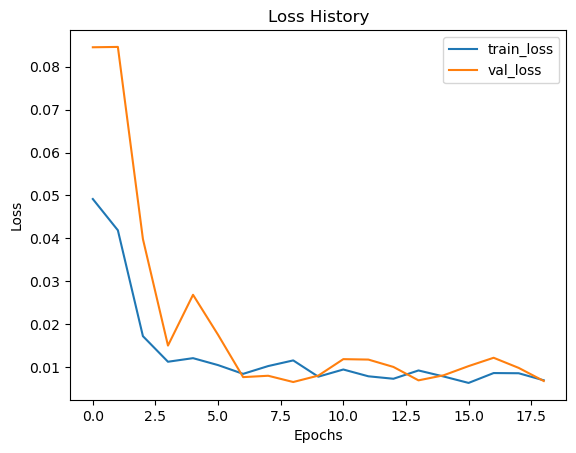

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

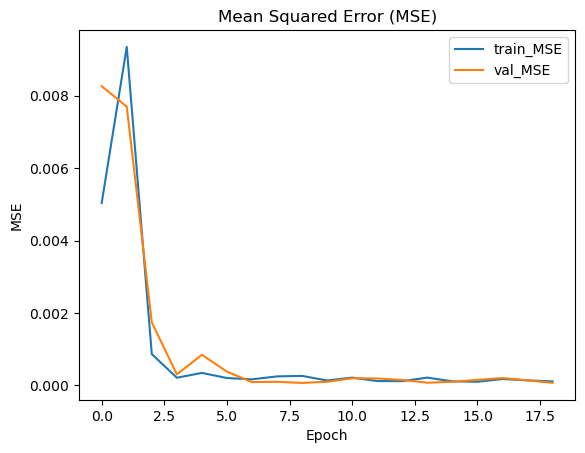

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

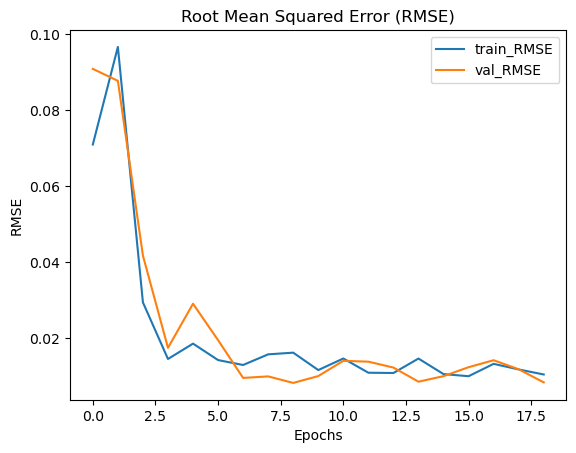

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

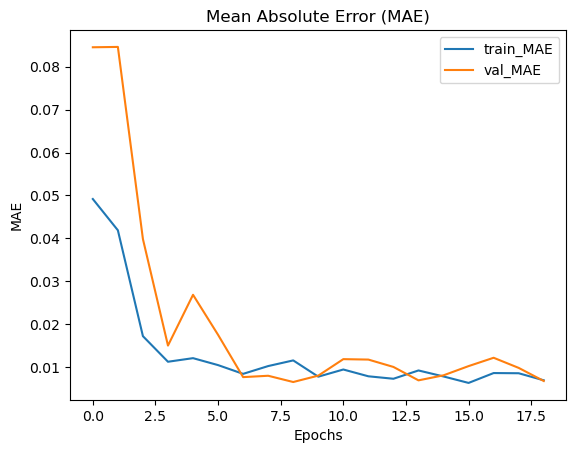

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

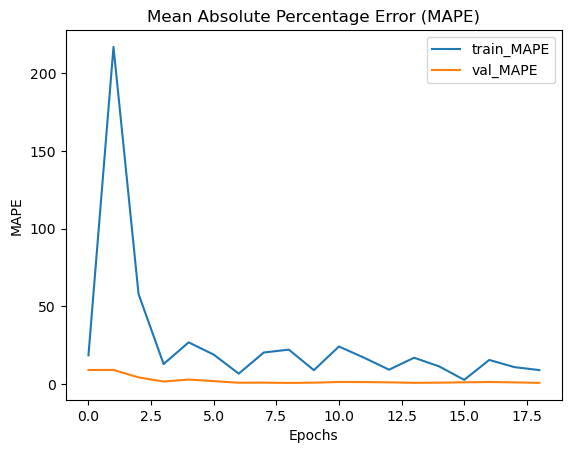

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:34:47.071240: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


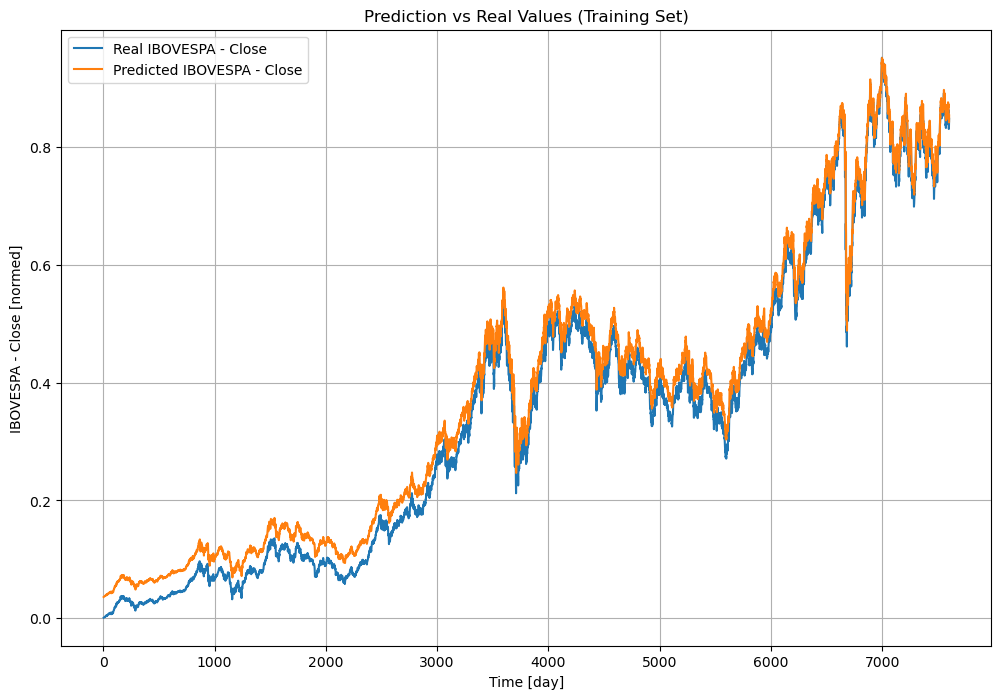

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


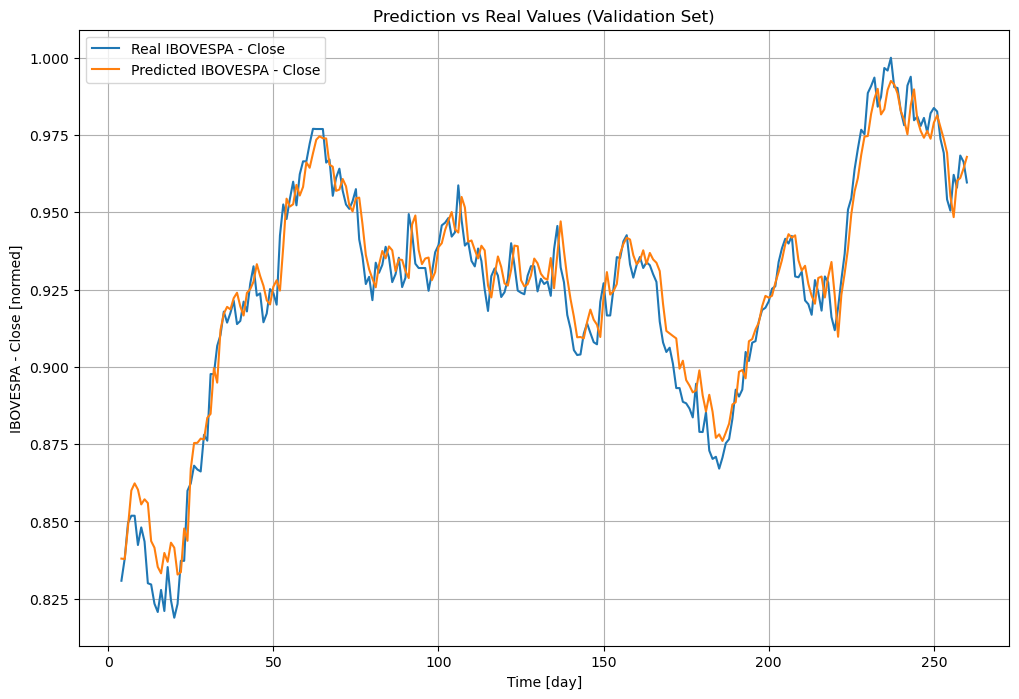

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


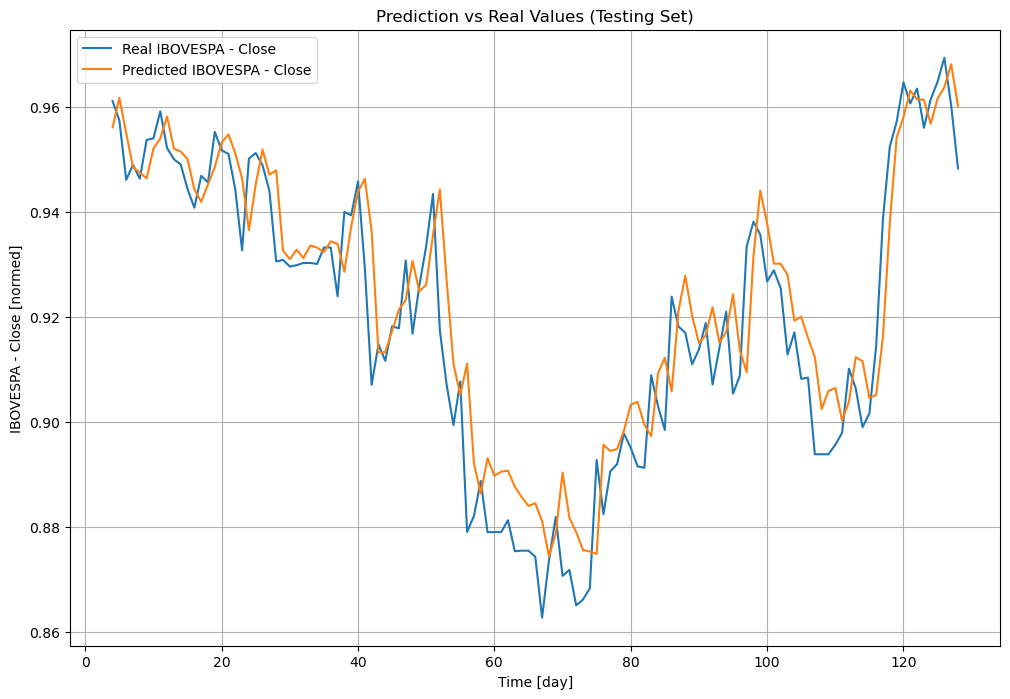

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

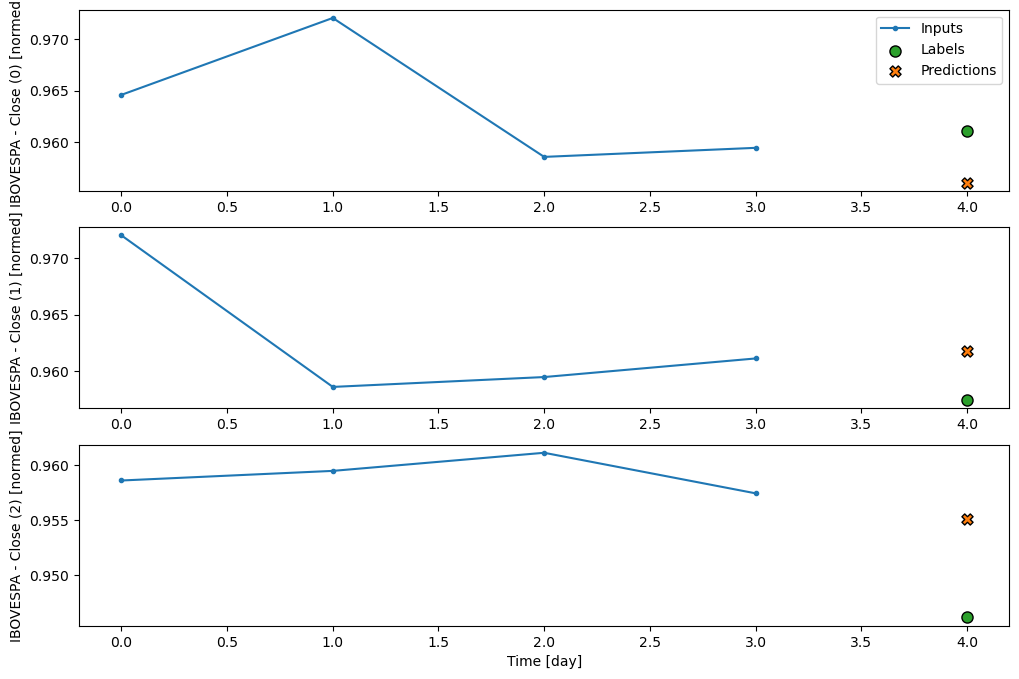

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:45s:922ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[[0.9560912 , 0.9560912 , 0.9560912 , ..., 0.9560912 ,
         0.9560912 , 0.9560912 ]],

       [[0.96173424, 0.96173424, 0.96173424, ..., 0.96173424,
         0.96173424, 0.96173424]],

       [[0.9550365 , 0.9550365 , 0.9550365 , ..., 0.9550365 ,
         0.9550365 , 0.9550365 ]],

       ...,

       [[0.9637597 , 0.9637597 , 0.9637597 , ..., 0.9637597 ,
         0.9637597 , 0.9637597 ]],

       [[0.96813446, 0.96813446, 0.96813446, ..., 0.96813446,
         0.96813446, 0.96813446]],

       [[0.9601231 , 0.9601231 , 0.9601231 , ..., 0.9601231 ,
         0.9601231 , 0.9601231 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')